In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re 
import seaborn as sns
from pathlib import Path

# Exploration Of Asthma Dataset 

In [4]:
# Load the Dataset
asthma_df = pd.read_csv("../data/asthma_disease_data.csv")   
asthma_df.head(5)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


## Basic overview

In [6]:
# Shape and basic info
print("Shape:", asthma_df.shape)
print("\nInfo:")
asthma_df.info()

# Summary statistics
asthma_df.describe(include="all").transpose()

Shape: (2392, 29)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               2392 non-null   int64  
 1   Age                     2392 non-null   int64  
 2   Gender                  2392 non-null   int64  
 3   Ethnicity               2392 non-null   int64  
 4   EducationLevel          2392 non-null   int64  
 5   BMI                     2392 non-null   float64
 6   Smoking                 2392 non-null   int64  
 7   PhysicalActivity        2392 non-null   float64
 8   DietQuality             2392 non-null   float64
 9   SleepQuality            2392 non-null   float64
 10  PollutionExposure       2392 non-null   float64
 11  PollenExposure          2392 non-null   float64
 12  DustExposure            2392 non-null   float64
 13  PetAllergy              2392 non-null   int64  
 14  FamilyHistoryAs

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PatientID,2392.0,NaN,NaN,NaN,6229.5,690.655244,5034.0,5631.75,6229.5,6827.25,7425.0
Age,2392.0,NaN,NaN,NaN,42.13796,21.606655,5.0,23.0,42.0,61.0,79.0
Gender,2392.0,NaN,NaN,NaN,0.493311,0.50006,0.0,0.0,0.0,1.0,1.0
Ethnicity,2392.0,NaN,NaN,NaN,0.669732,0.98612,0.0,0.0,0.0,1.0,3.0
EducationLevel,2392.0,NaN,NaN,NaN,1.307274,0.898242,0.0,1.0,1.0,2.0,3.0
BMI,2392.0,NaN,NaN,NaN,27.244877,7.201628,15.031803,20.968313,27.052202,33.555903,39.985611
Smoking,2392.0,NaN,NaN,NaN,0.141722,0.348838,0.0,0.0,0.0,0.0,1.0
PhysicalActivity,2392.0,NaN,NaN,NaN,5.051786,2.903574,0.00174,2.578333,5.016881,7.540234,9.995809
DietQuality,2392.0,NaN,NaN,NaN,5.022867,2.90998,0.003031,2.432043,5.115383,7.544216,9.999904
SleepQuality,2392.0,NaN,NaN,NaN,7.019012,1.732475,4.001437,5.4985,6.975839,8.52695,9.996235


## Missing values Check

In [8]:
# Count missing values
missing = asthma_df.isna().sum().sort_values(ascending=False)

if missing.sum() == 0:
    print("No missing values in the dataset.")
else:
    print("Missing values:\n", missing[missing > 0])
    sns.heatmap(df.isna(), cbar=False)
    plt.title("Missing Values Heatmap")
    plt.show()

No missing values in the dataset.


The dataset contains no missing values, which is likely due to the fact that it represents medical data on diseases, where records are expected to be complete and accurately documented.     

In [9]:
LABEL_MAPS = {
    "Gender": {0: "Male", 1: "Female"},
    "Ethnicity": {0: "Caucasian", 1: "African American", 2: "Asian", 3: "Other"}, 
    "EducationLevel": {0: "None", 1: "High School", 2: "Bachelor's", 3: "Higher" }, 
    "Smoking": {0: "No", 1: "Yes"},
    "PetAllergy": {0: "No", 1: "Yes"},
    "FamilyHistoryAsthma": {0: "No", 1: "Yes"},
    "HistoryOfAllergies": {0: "No", 1: "Yes"},
    "Eczema": {0: "No", 1: "Yes"},
    "HayFever": {0: "No", 1: "Yes"},
    "GastroesophagealReflux": {0: "No", 1: "Yes"},
    "Wheezing": {0: "No", 1: "Yes"},
    "ShortnessOfBreath": {0: "No", 1: "Yes"},
    "ChestTightness": {0: "No", 1: "Yes"},
    "Coughing": {0: "No", 1: "Yes"},
    "NighttimeSymptoms": {0: "No", 1: "Yes"},
    "ExerciseInduced": {0: "No", 1: "Yes"},
    "Diagnosis": {0: "No", 1: "Yes"},
}

## Visualizations

I will prepare the following plots
 
- histograms for continuous features; 

- countplots for categorical/binary features (mapped to readable labels).

In [10]:

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.xmargin"] = 0.0   # no extra left/right padding
plt.rcParams["axes.ymargin"] = 0.02  # small headroom at the top

LABEL_MAPS = {
    "Gender": {0: "Male", 1: "Female"},
    "Ethnicity": {0: "Caucasian", 1: "African American", 2: "Asian", 3: "Other"}, 
    "EducationLevel": {0: "None", 1: "High School", 2: "Bachelor's", 3: "Higher" }, 
    "Smoking": {0: "No", 1: "Yes"},
    "PetAllergy": {0: "No", 1: "Yes"},
    "FamilyHistoryAsthma": {0: "No", 1: "Yes"},
    "HistoryOfAllergies": {0: "No", 1: "Yes"},
    "Eczema": {0: "No", 1: "Yes"},
    "HayFever": {0: "No", 1: "Yes"},
    "GastroesophagealReflux": {0: "No", 1: "Yes"},
    "Wheezing": {0: "No", 1: "Yes"},
    "ShortnessOfBreath": {0: "No", 1: "Yes"},
    "ChestTightness": {0: "No", 1: "Yes"},
    "Coughing": {0: "No", 1: "Yes"},
    "NighttimeSymptoms": {0: "No", 1: "Yes"},
    "ExerciseInduced": {0: "No", 1: "Yes"},
    "Diagnosis": {0: "No", 1: "Yes"},
}

def apply_label_map(series: pd.Series, mapping: dict) -> pd.Series:
    mapped = series.map(mapping)
    return mapped.fillna(series.astype(str))

def _slugify(text: str) -> str:
    return re.sub(r"[^a-zA-Z0-9_-]+", "_", text).strip("_").lower()

def plot_distributions(
    df: pd.DataFrame,
    continuous_cols: list,
    categorical_cols: list,
    *,
    label_maps: dict = LABEL_MAPS,
    bins: int = 20,
    kde: bool = True,
    rotate_xticks: bool = True,
    by_diagnosis: bool = False,
    diagnosis_col: str = "Diagnosis",
    save: bool = False,
    out_dir: Path | None = None,
    img_format: str = "png",
    dpi: int = 120,
):
    """
    Plot histograms for continuous features and countplots for categorical features.
    Removes empty margins. Optionally split plots by diagnosis and save to disk.
    """
    data = df.copy()

    # Prepare output directory
    if save:
        out_dir = Path(out_dir) if out_dir is not None else Path("reports/figures/eda")
        out_dir.mkdir(parents=True, exist_ok=True)

    # Prepare diagnosis label if requested
    diag_label_col = None
    if by_diagnosis and diagnosis_col in data.columns:
        diag_label_col = f"{diagnosis_col}_label"
        data[diag_label_col] = apply_label_map(data[diagnosis_col], label_maps.get(diagnosis_col, {}))

    # ---- Continuous: histograms ----
    for col in continuous_cols:
        if col not in data.columns:
            continue
        plt.figure()
        if by_diagnosis and diag_label_col:
            bins_edges = np.histogram_bin_edges(data[col].dropna().astype(float), bins=bins)
            ax = sns.histplot(
                data=data, x=col, hue=diag_label_col,
                bins=bins_edges, kde=kde, element="step",
                common_norm=False, stat="count"
            )
            title = f"{col} — Distribution by Diagnosis"
        else:
            ax = sns.histplot(data[col], bins=bins, kde=kde)
            title = f"Distribution of {col}"

        # tighten x/y limits
        xmin = np.nanmin(data[col])
        xmax = np.nanmax(data[col])
        rng = xmax - xmin
        pad = 0.01 * rng if rng > 0 else 0.5
        ax.set_xlim(xmin - pad, xmax + pad)
        ax.set_ylim(bottom=0)
        ax.margins(x=0, y=0.02)

        ax.set_title(title); ax.set_xlabel(col); ax.set_ylabel("Count")
        plt.tight_layout()

        if save:
            fname = _slugify(title) + f".{img_format}"
            plt.savefig(out_dir / fname, format=img_format, dpi=dpi,
                        bbox_inches="tight", pad_inches=0.02)
        plt.show()

    # ---- Categorical: countplots ----
    for col in categorical_cols:
        if col not in data.columns:
            continue

        label_col = f"{col}_label"
        data[label_col] = apply_label_map(data[col], label_maps.get(col, {}))
        plt.figure()
        if by_diagnosis and diag_label_col:
            ax = sns.countplot(data=data, x=label_col, hue=diag_label_col,
                               order=data[label_col].value_counts().index)
            title = f"{col} — Counts by Diagnosis"
        else:
            ax = sns.countplot(data=data, x=label_col,
                               order=data[label_col].value_counts().index)
            title = f"Distribution of {col}"

        # tighten x/y limits
        cats = data[label_col].value_counts().index
        ax.set_xlim(-0.5, len(cats) - 0.5)
        ax.set_ylim(bottom=0)
        ax.margins(x=0, y=0.02)

        ax.set_title(title); ax.set_xlabel(col); ax.set_ylabel("Count")
        if rotate_xticks:
            plt.xticks(rotation=30, ha="right")
        plt.tight_layout()

        if save:
            fname = _slugify(title) + f".{img_format}"
            plt.savefig(out_dir / fname, format=img_format, dpi=dpi,
                        bbox_inches="tight", pad_inches=0.02)
        plt.show()

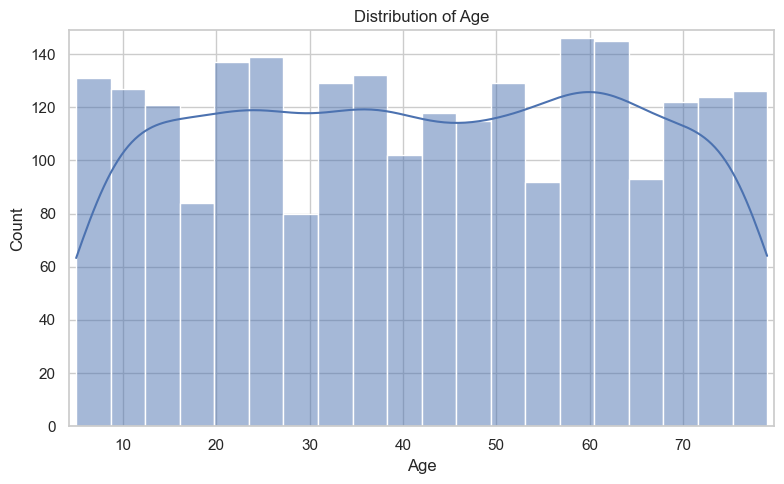

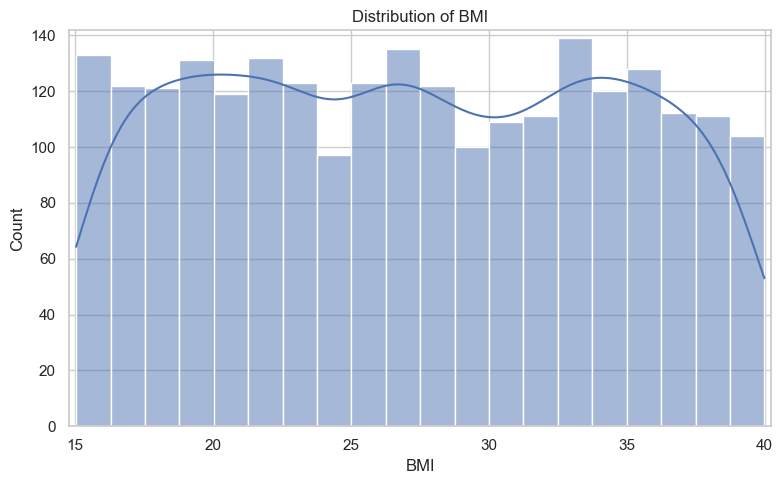

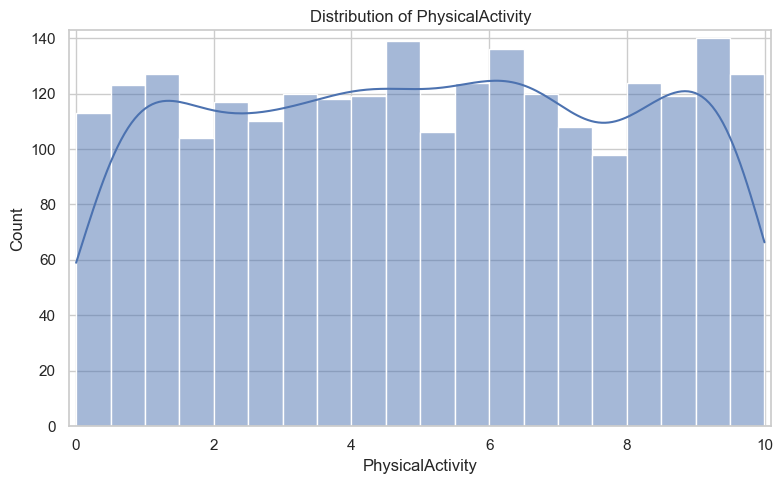

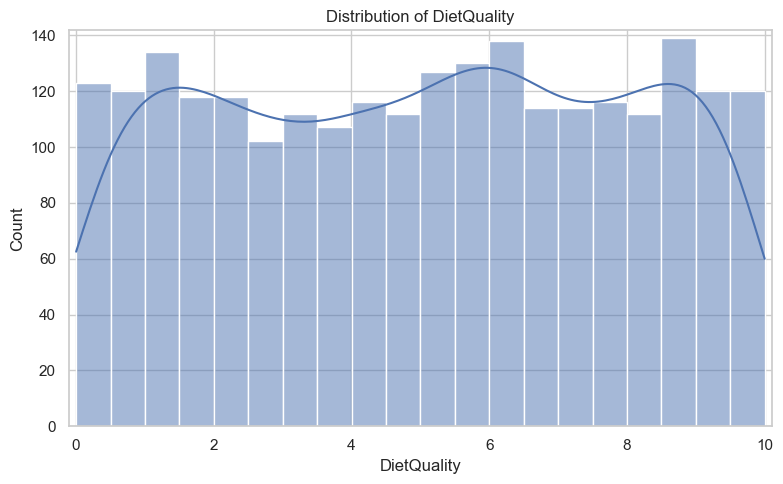

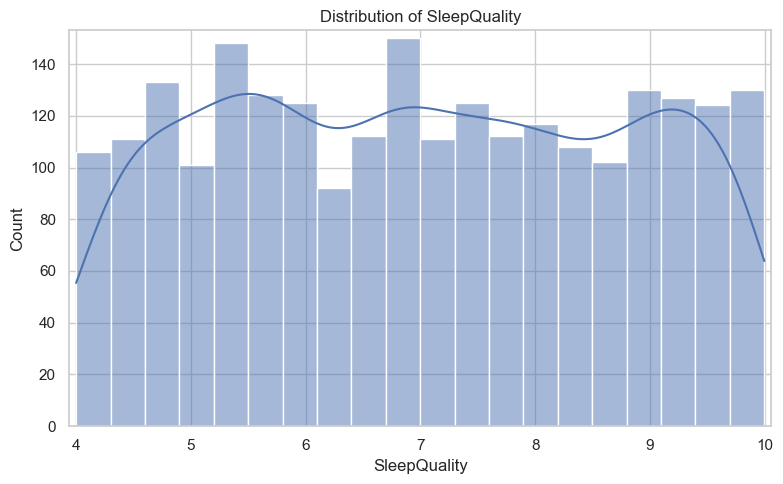

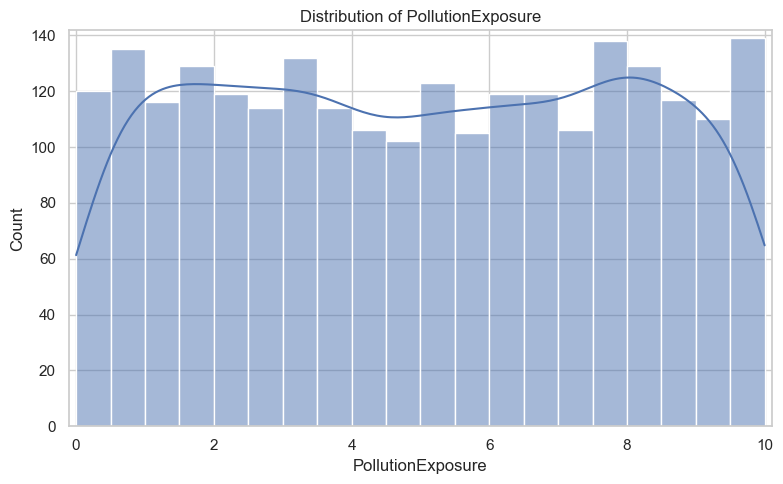

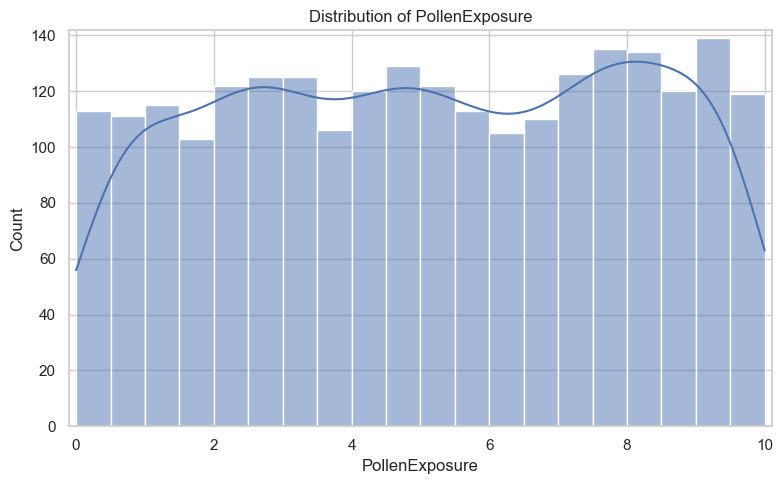

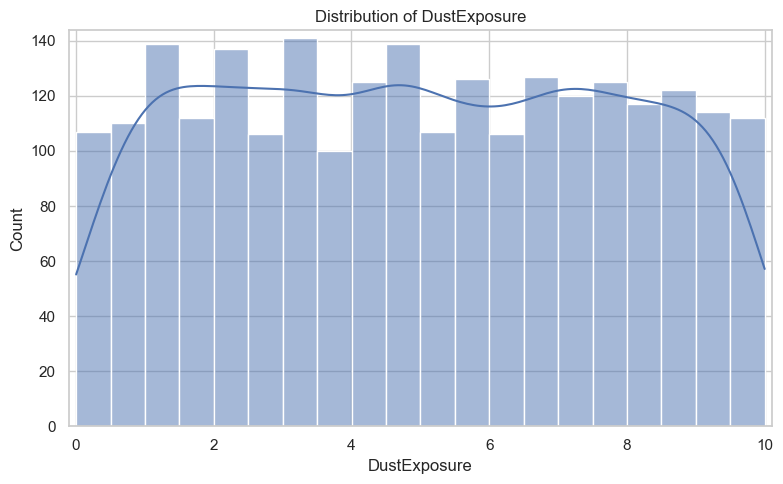

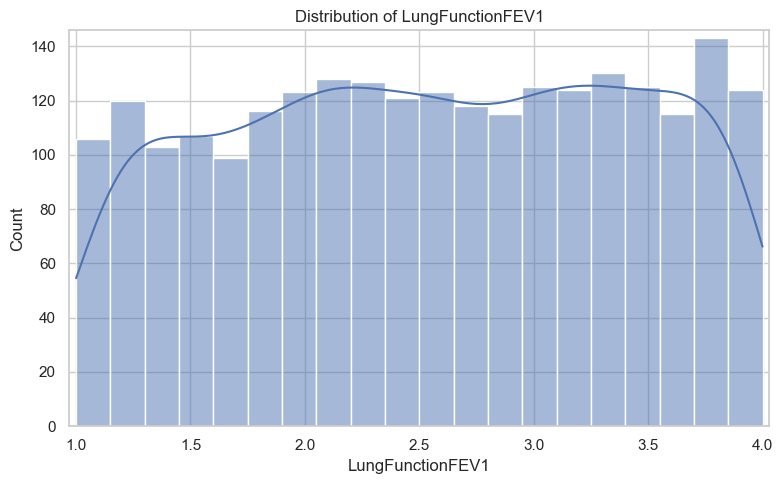

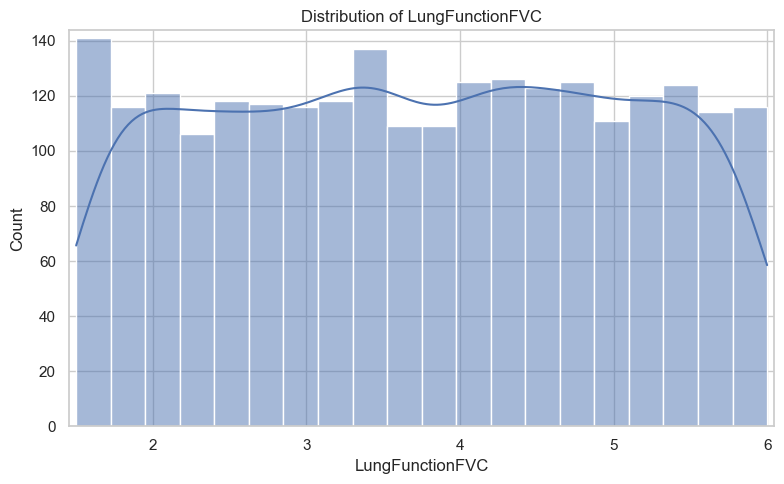

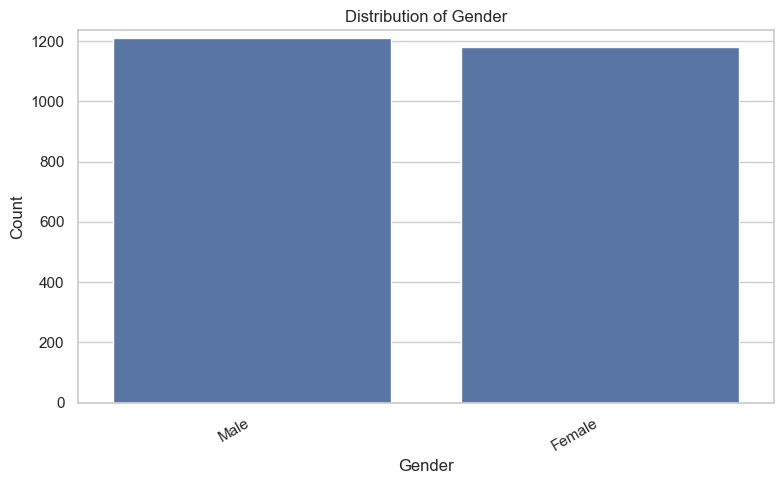

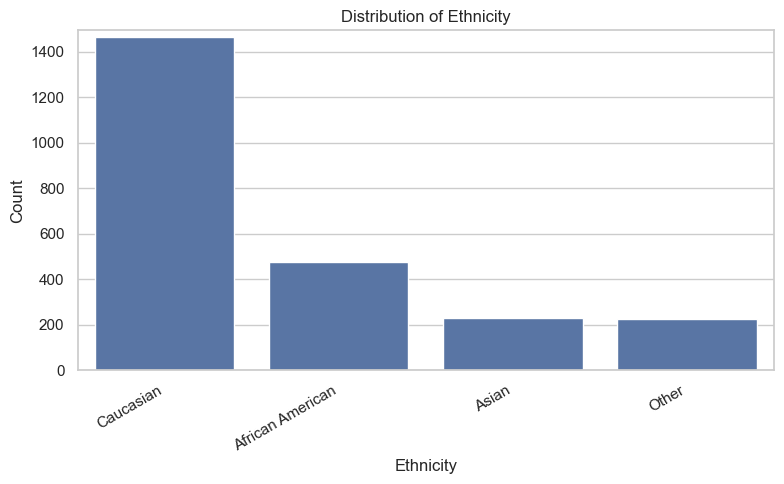

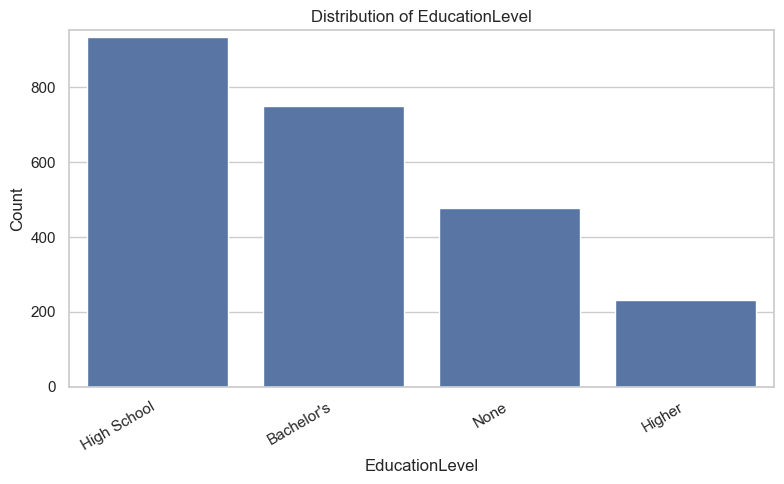

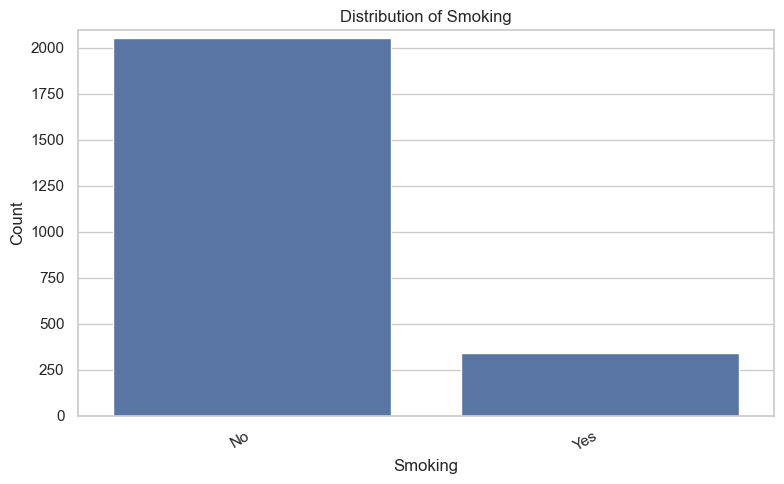

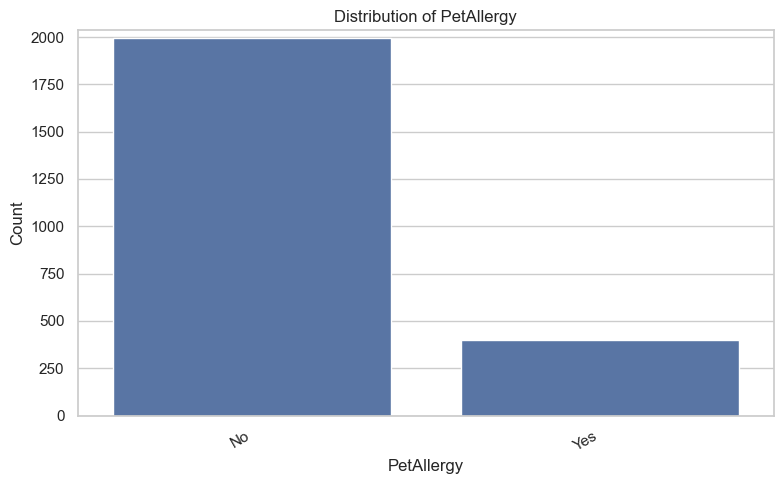

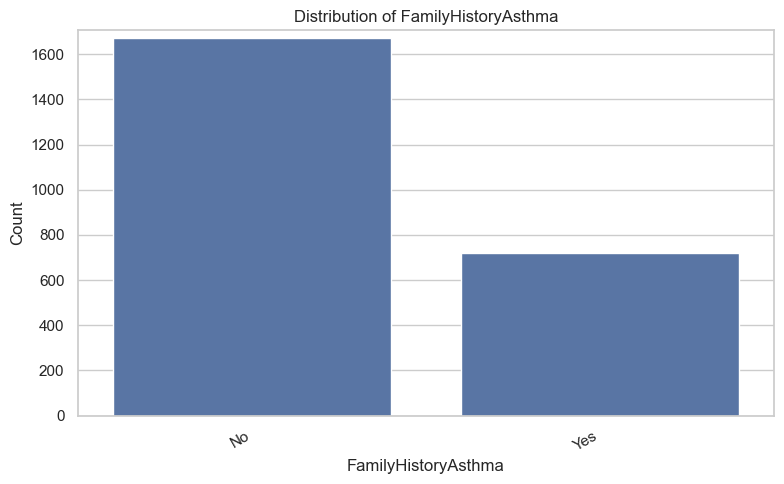

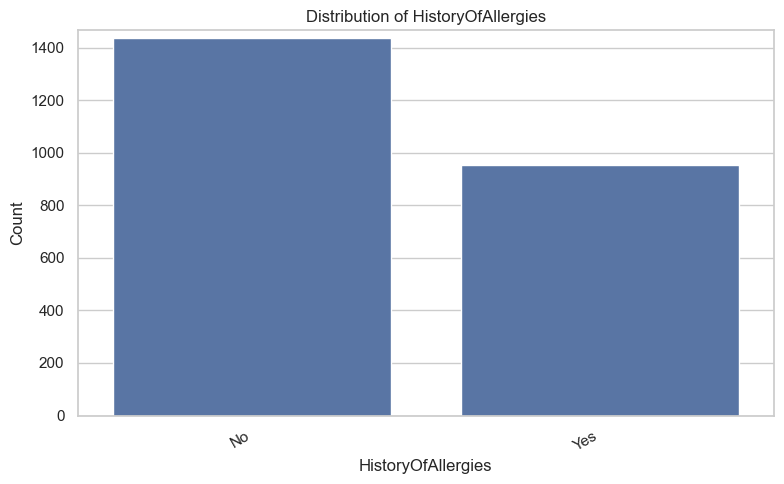

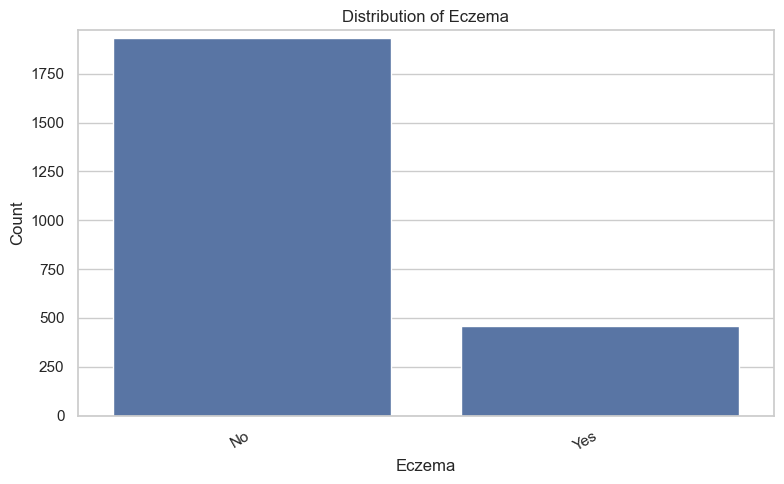

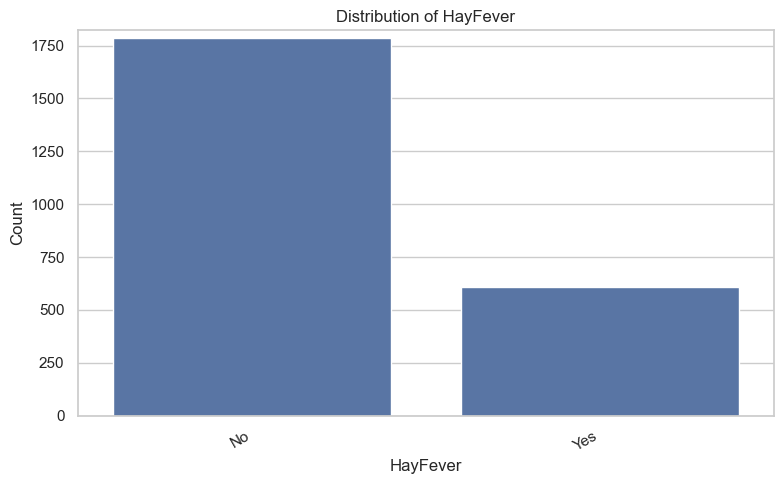

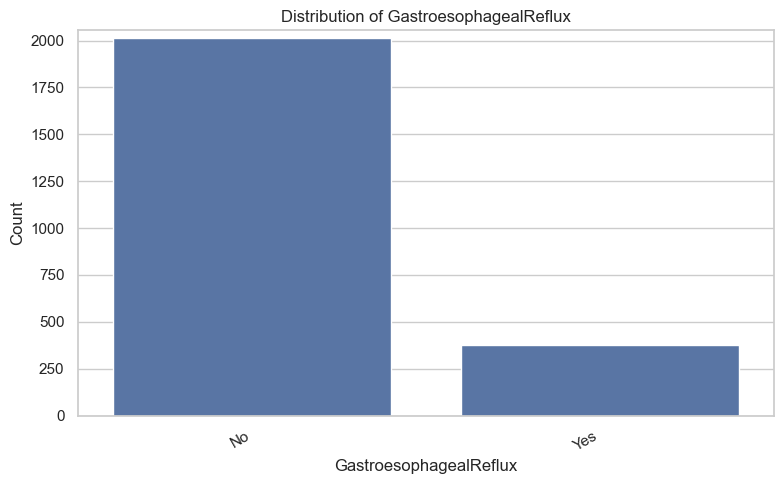

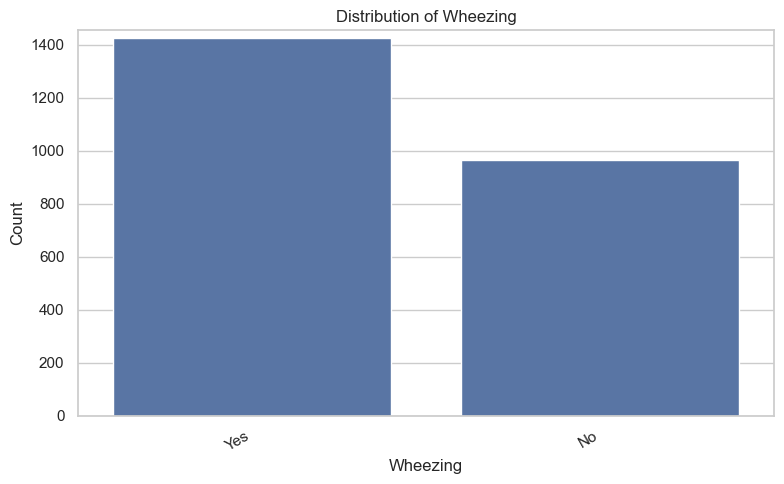

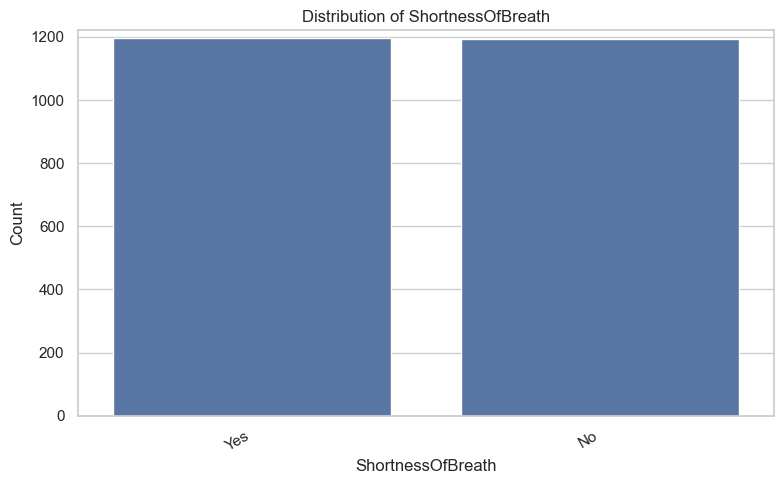

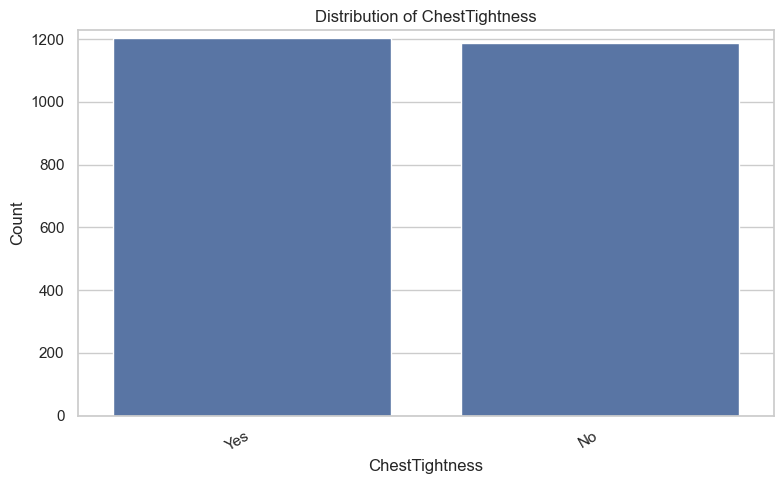

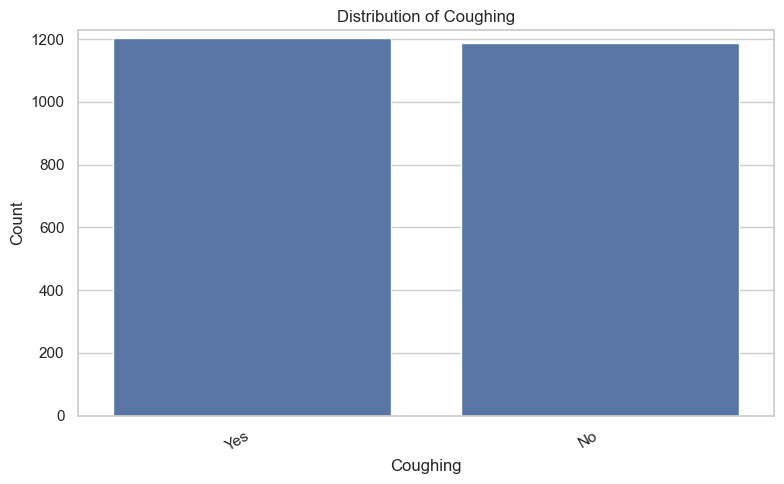

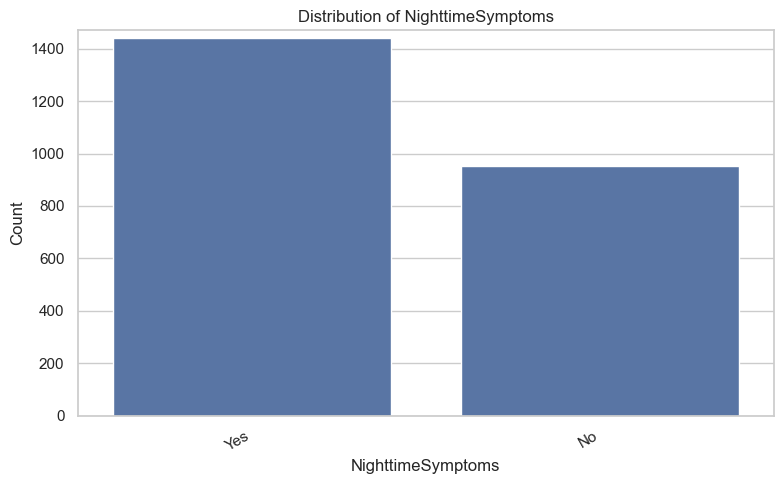

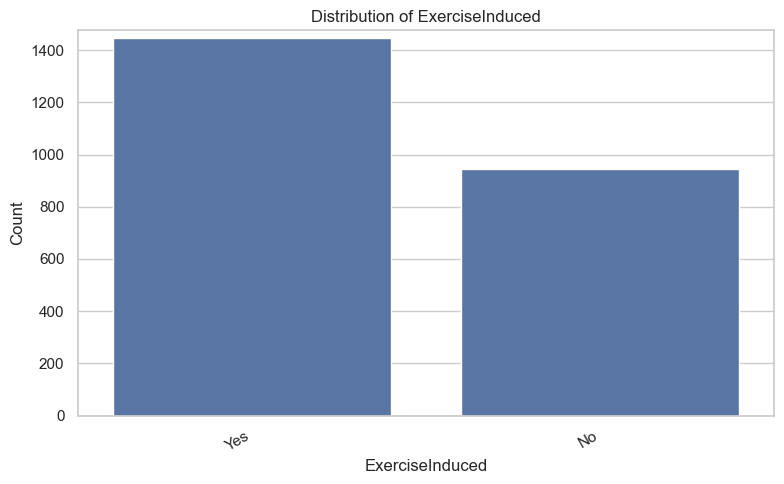

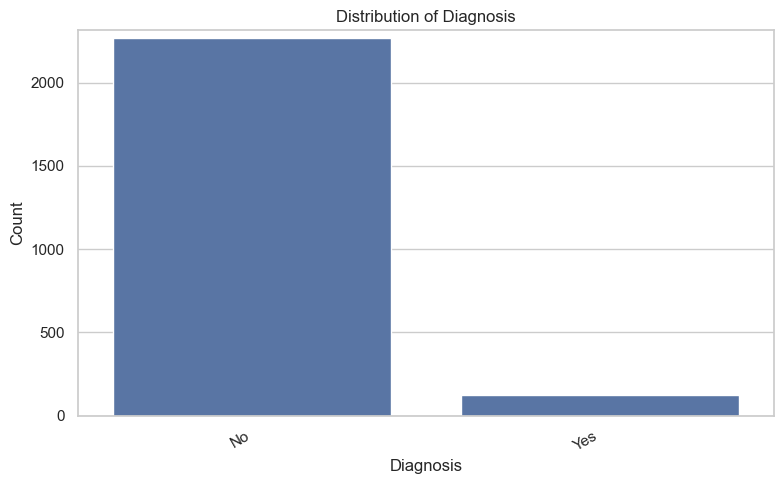

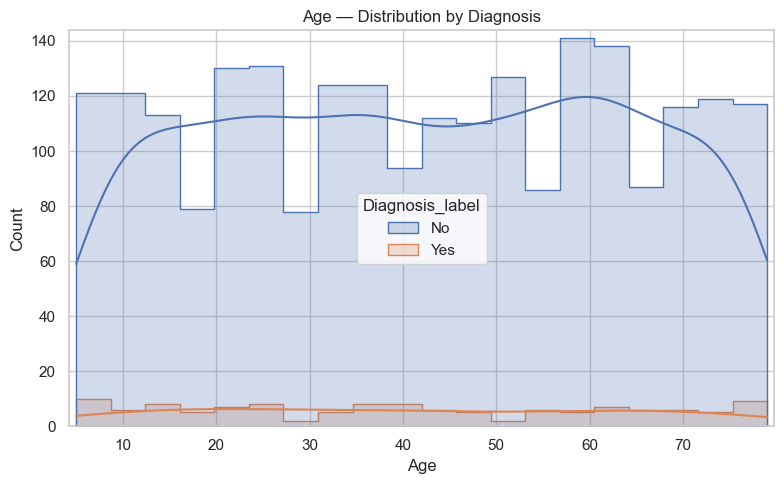

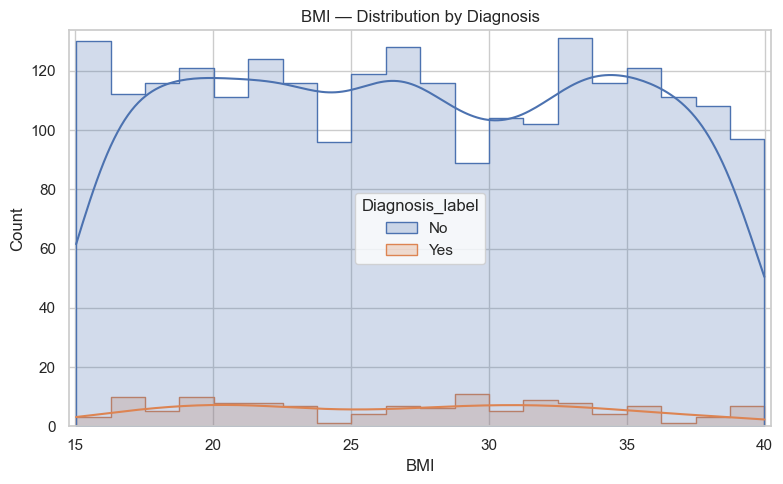

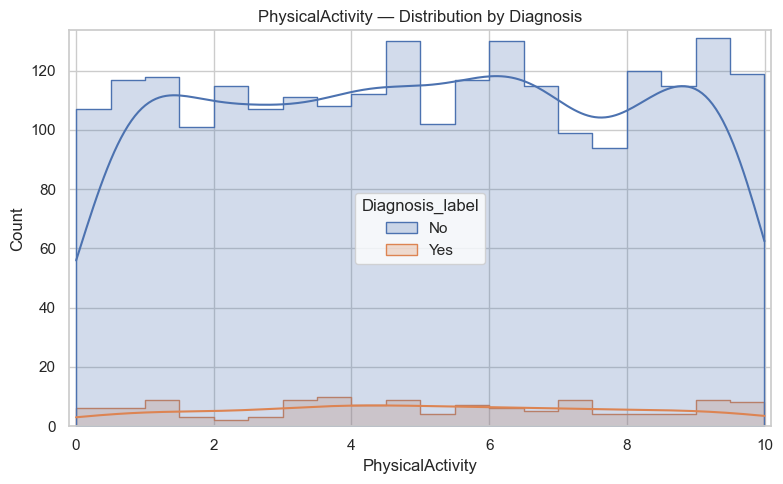

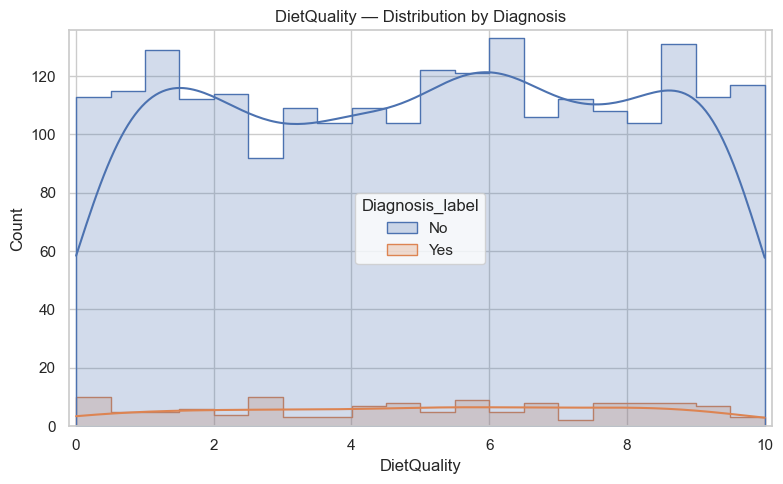

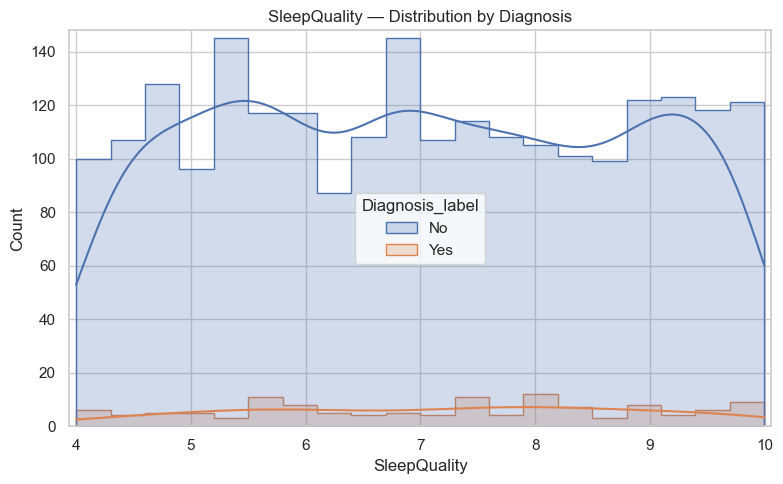

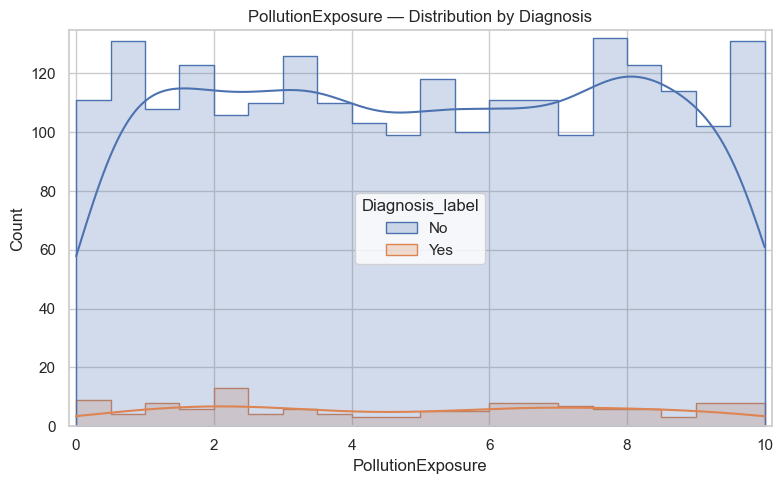

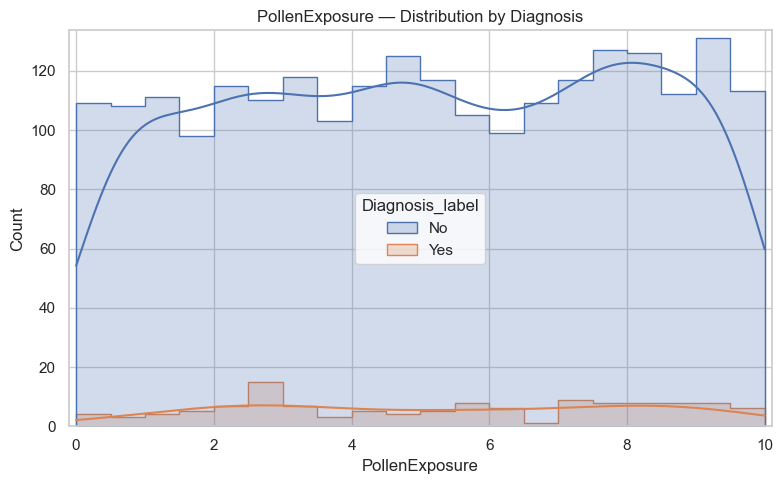

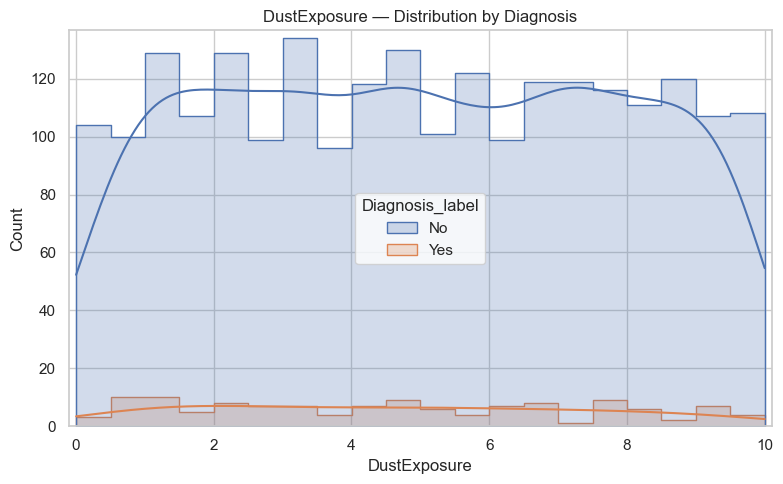

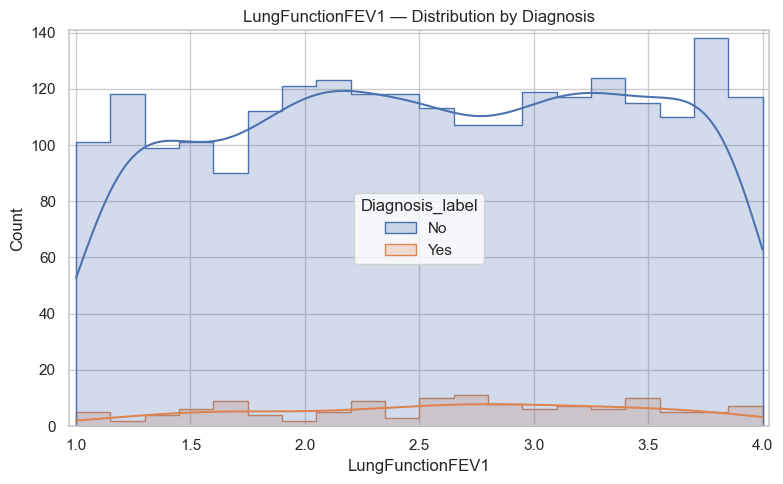

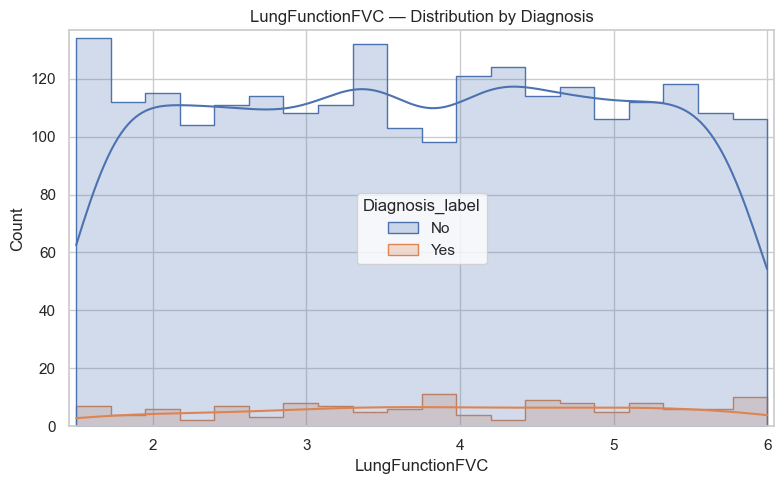

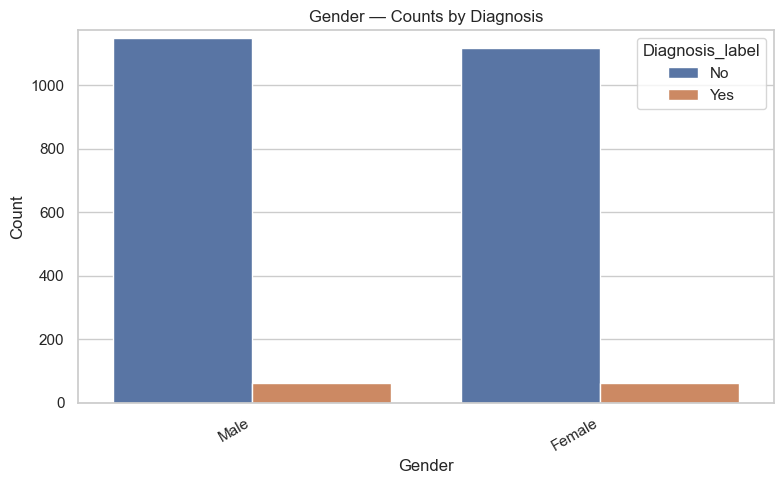

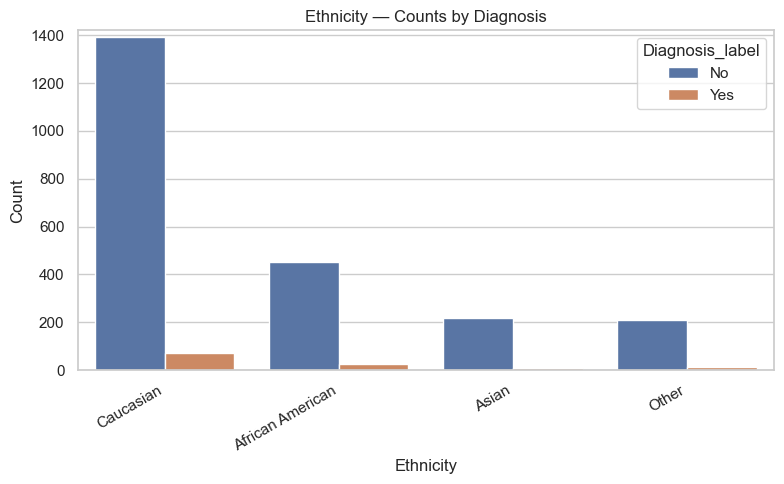

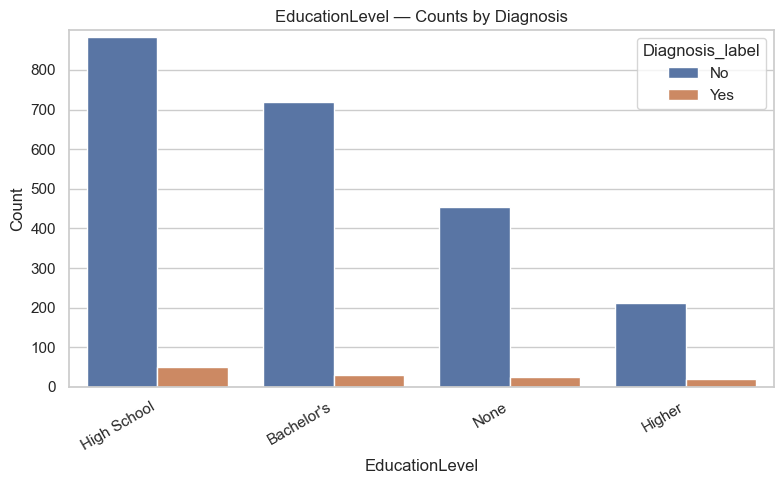

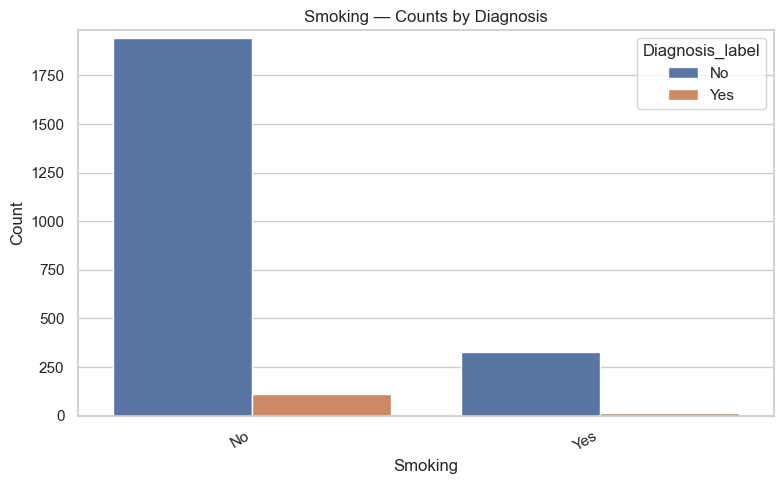

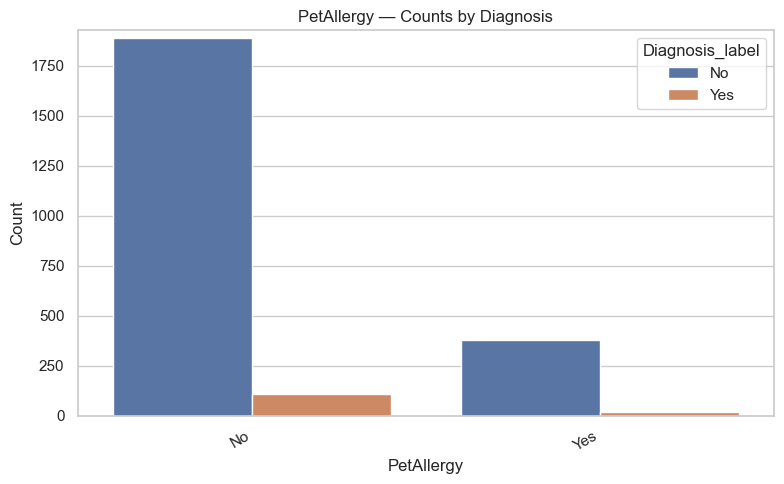

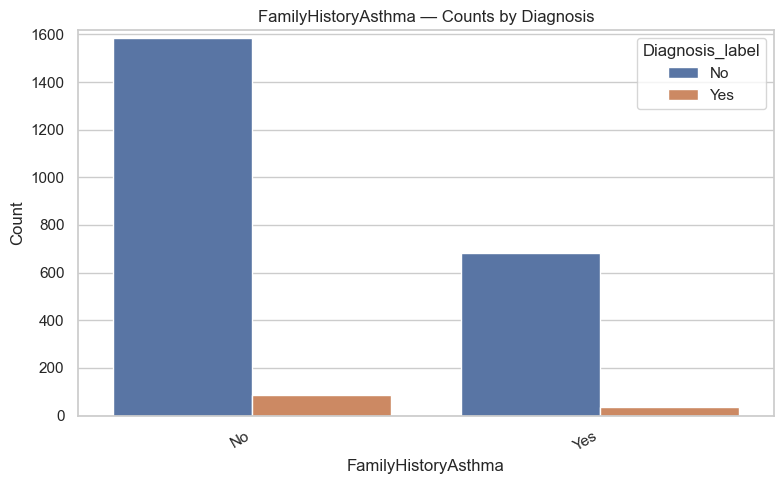

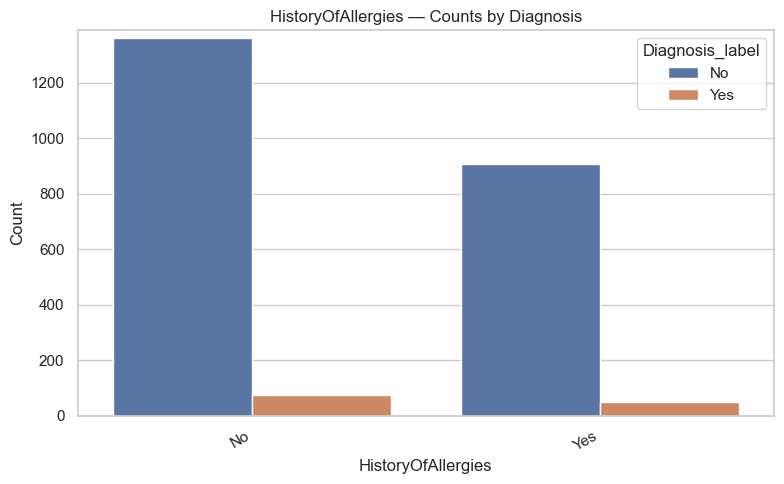

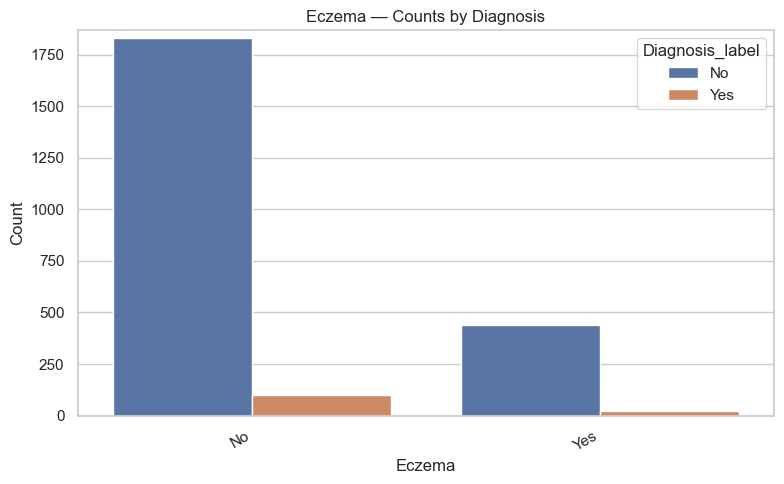

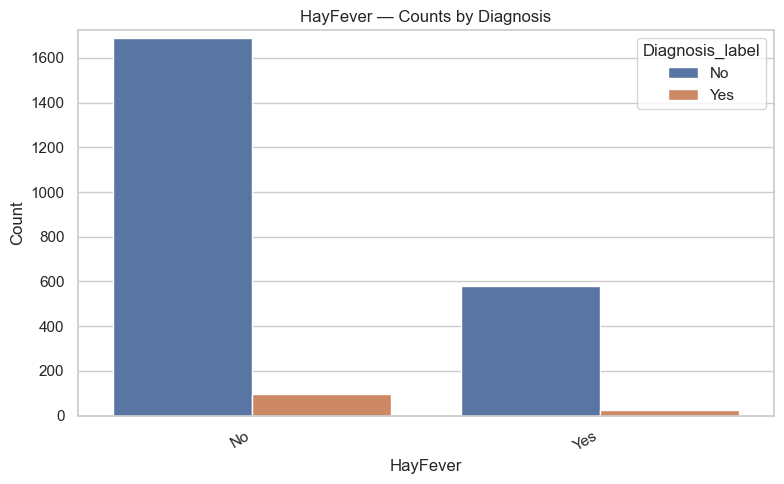

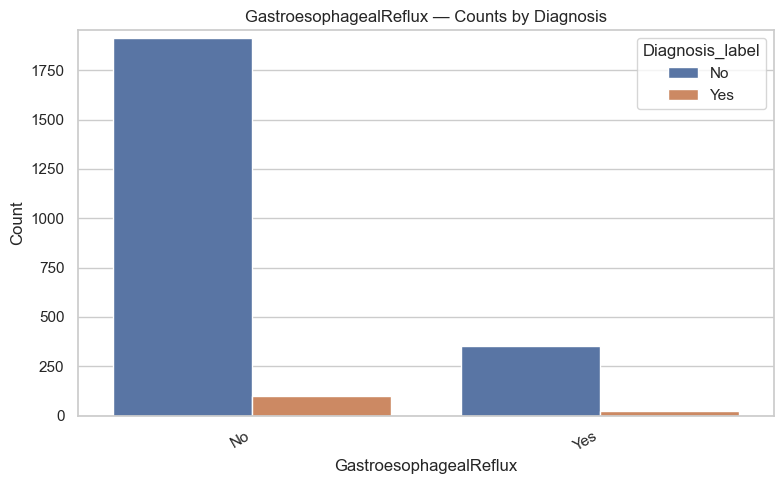

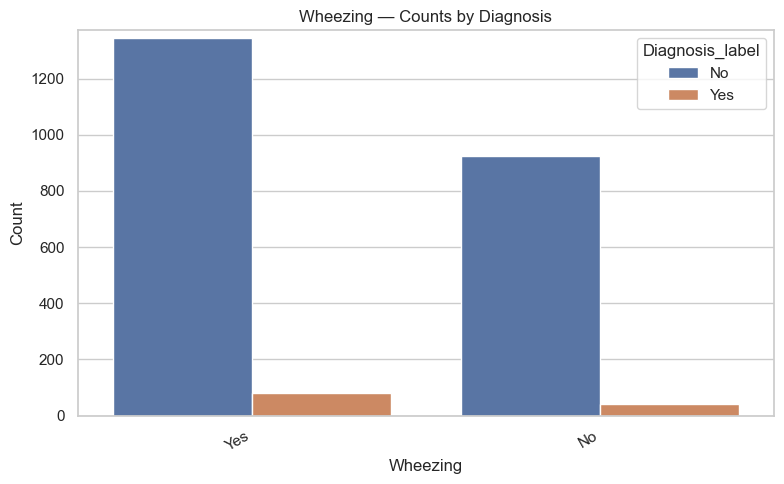

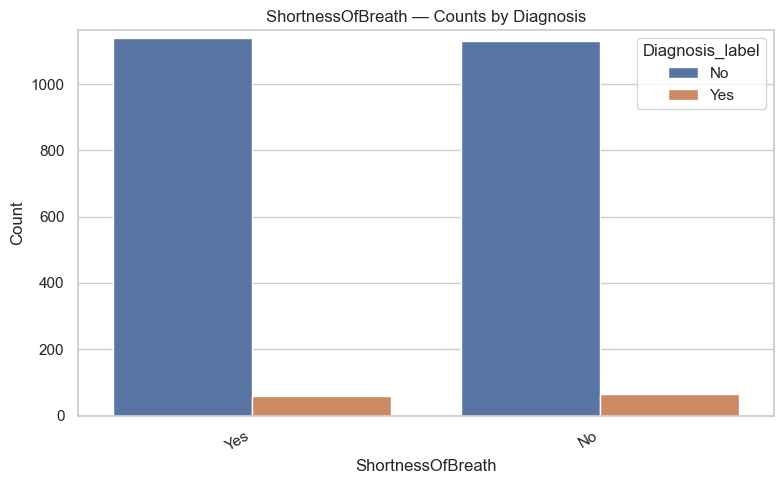

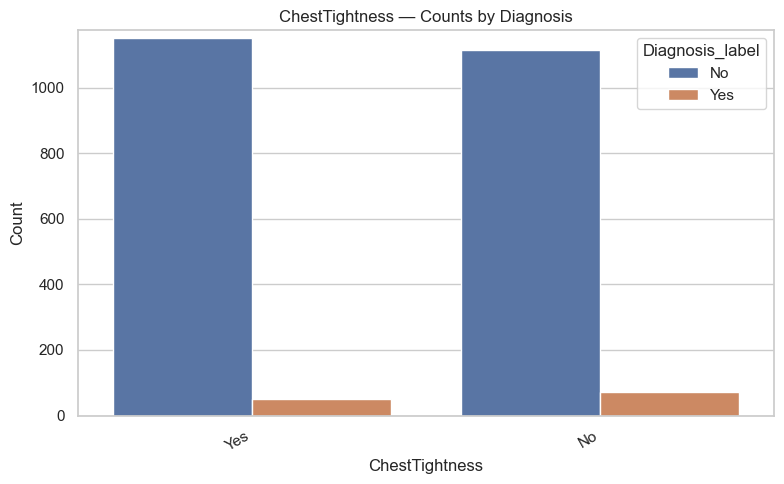

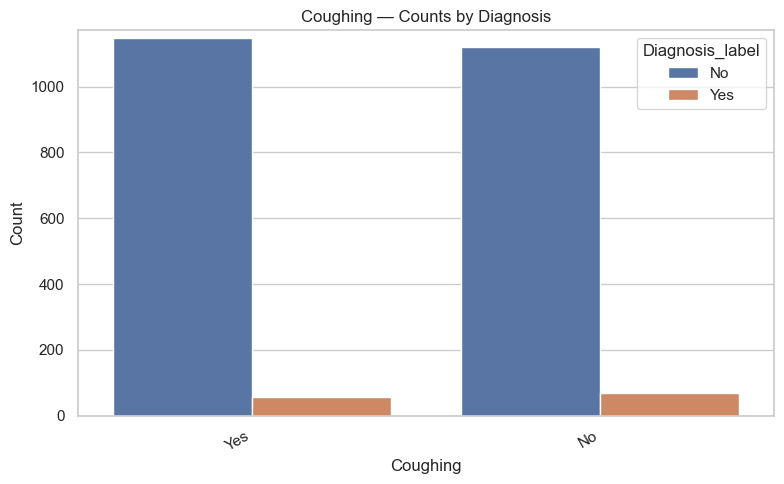

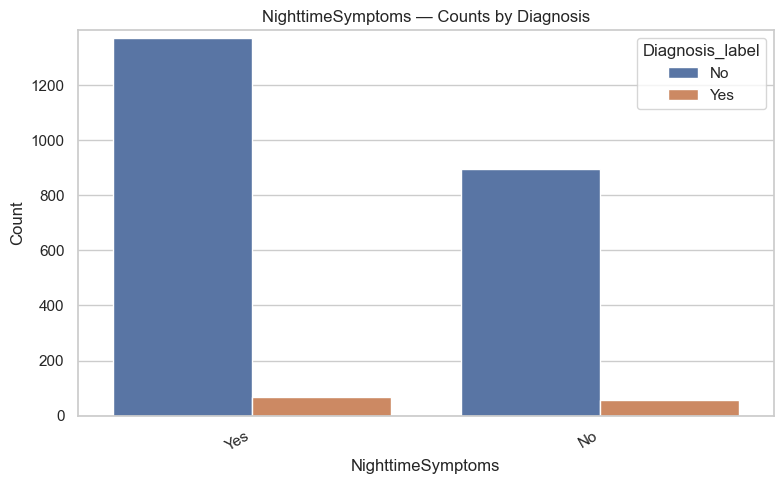

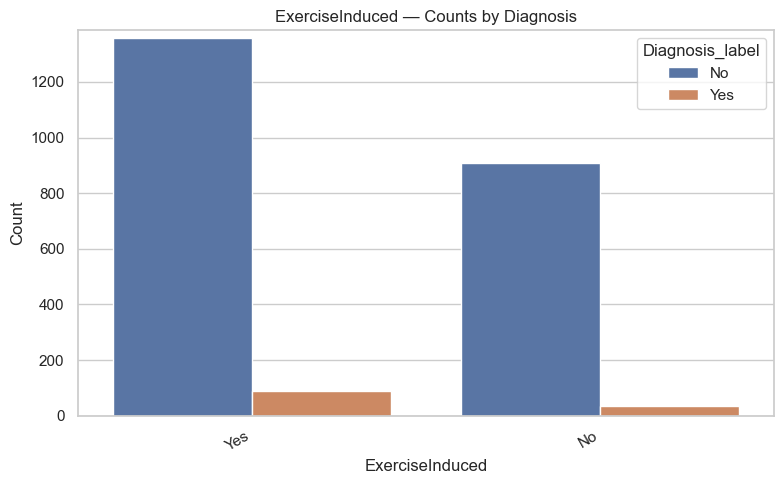

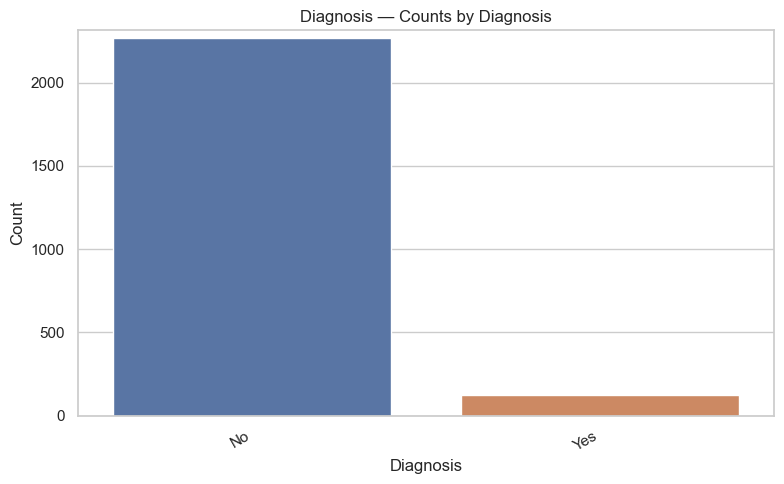

In [11]:
continuous_cols = [
    "Age", "BMI", "PhysicalActivity", "DietQuality",
    "SleepQuality", "PollutionExposure", "PollenExposure",
    "DustExposure", "LungFunctionFEV1", "LungFunctionFVC"
]

categorical_cols = [
    "Gender", "Ethnicity", "EducationLevel", "Smoking",
    "PetAllergy", "FamilyHistoryAsthma", "HistoryOfAllergies",
    "Eczema", "HayFever", "GastroesophagealReflux",
    "Wheezing", "ShortnessOfBreath", "ChestTightness",
    "Coughing", "NighttimeSymptoms", "ExerciseInduced",
    "Diagnosis"
]

# 1) Plain univariate distributions
plot_distributions(asthma_df, continuous_cols, categorical_cols)

# 2) Split by diagnosis (great for quick comparisons)
plot_distributions(asthma_df, continuous_cols, categorical_cols, by_diagnosis=True)